# Tests

In [1]:
%display latex
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

## Example 1: Simple

In [2]:
from flowstar.reachability import Reach
from flowstar.poly import Poly
from ulbc import *

In [3]:
R.<x,y> = RIF[]

In [4]:
System?

Init signature: System(R, x: tuple, y0: tuple, y: tuple, varmap: Union[dict, NoneType] = None, y0_ctx: Union[tuple, NoneType] = None)
File:           ~/Documents/PhD/Notebooks/ulbc/bondcalculus.py
Type:           type


In [5]:
system = System(
    R,
    (x,y),
    [(4,5), (1,2)],
    [
        -y,
        x,
    ],
)

In [6]:
system.y

(-y, x)

In [7]:
reach = system.reach(2*pi, step=0.8, order=15, estimation=1e-5, cutoff_threshold=1e-10, precompose_taylor_models=True)

calling reach with y0 = ['[4.0000000000000000 .. 5.0000000000000000]', '[1.0000000000000000 .. 2.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [4.0..5.0]
C = [1.0..2.0]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2


In [8]:
def plot_signal(sig):
    return sig.to_domain(RIF(0,2*pi)).plot().show(
        ticks=[pi/2, 1], tick_formatter=pi, aspect_ratio=2/3)

In [9]:
reach.res

2

In [10]:
P = Atomic(x - 3); P

Atomic(x - 3)

computing sig
PolyObserver(x - 3, <flowstar.reachability.Reach object at 0x7f1b172bf900>, -y, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.21473461056256926 .. 0.80000000000000005], [4.7100807333397067 .. 5.6000000000000024], [6.3134824753956175 .. 6.4000000000000031]]
domain = [0.0000000000000000 .. 6.2831853071795863]
roots = [[0.21473461056256926 .. 0.80000000000000005], 
 [4.7100807333397067 .. 5.6000000000000024], 
 [6.3134824753956175 .. 6.4000000000000031]]
seg_domain = [0.0000000000000000 .. 6.2831853071795863]
roots = [[0.21473461056256926 .. 0.80000000000000005], 
 [4.7100807333397067 .. 5.6000000000000024], 
 [6.3134824753956175 .. 6.4000000000000031]]
signal given bool roots: 1 items in 0.00 seconds
generating plot
PolyObserver(x - 3, <flows

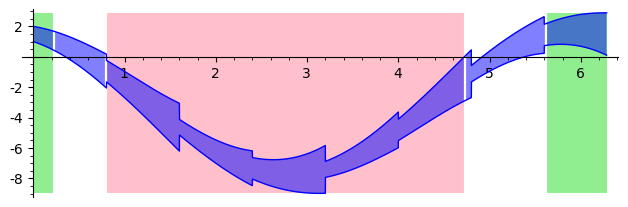

In [11]:
plt = P.visualize(reach=reach)
plt.show(aspect_ratio=1/6)

In [12]:
prop = {y: RIF(1, 5)} >> G(RIF(pi/8), Atomic(x + 0.5))

In [13]:
sig = prop.signal_for_system(system.with_y0([RIF(1, 2), RIF(3, 4)]),
                             2*sage.pi,
                             epsilon_ctx=0.01)
sig

s: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.01 seconds
ran "check boolean [unguarded]" 2 times in 8.344650268554688e-06
ran "capturing globals [on exit]" 9 times in 6.556510925292969e-05
ran "observer.check" 2 times in 8.487701416015625e-05
ran "prepare in check" 2 times in 1.0967254638671875e-05
ran "restoring globals" 9 times in 9.369850158691406e-05
ran "whole domain eval" 3 times in 0.0006489753723144531
ran "mask intersect check" 4 times in 2.6226043701171875e-06
ran "root detection" 3 times in 0.0015747547149658203
ran "post retrieve" 3 times in 9.775161743164062e-06
ran "tentative eval" 4 times in 0.0006525516510009766
ran "root amalgamation" 3 times in 1.6689300537109375e-06
ran "composing flowpipe" 3 times in 0.0012066364288330078
calling reach with y0 = [('None', '[1.0297232761710035 .. 2.1875322936368802]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.8784946763604044 .. 4

Signal([0.0000000000000000 .. 6.2831853071795872], [([0.28234230872095800 .. 2.8663882211453782], False), ([3.8545863016687307 .. 5.5854674116537347], True), ([5.6038810404833618 .. 5.6100189167599038], True)], mask=None)

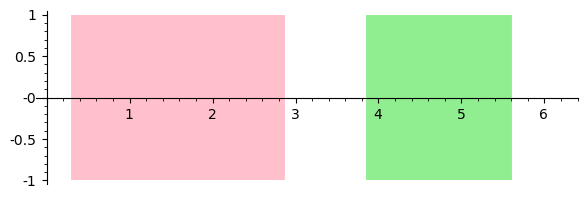

In [14]:
sig.plot()

In [15]:
csig = prop.context_signal_for_system(system.with_y0([RIF(1, 2), RIF(3, 4)]),
                             2*sage.pi,
                             epsilon_ctx=0.1,
                             refine=1)
csig

==> calling context signal
Monitoring initial signal: 1 items in 0.00 seconds


AssertionError: 

In [ ]:
csig.refined_signal(1).plot()

In [17]:
csig = prop.context_signal_for_system(system.with_y0([RIF(1, 2), RIF(3, 4)]),
                             2*sage.pi,
                             epsilon_ctx=0.1,
                             refine=2)
csig

==> calling context signal
Monitoring initial signal: 1 items in 0.00 seconds


AssertionError: 

In [18]:
csig.refined_signal(0).plot()

NameError: name 'csig' is not defined

In [19]:
csig = prop.context_signal_for_system(system.with_y0([RIF(1, 2), RIF(3, 4)]),
                             2*sage.pi,
                             epsilon_ctx=0.1,
                             refine=0)
csig

==> calling context signal
Monitoring initial signal: 1 items in 0.00 seconds


AssertionError: 

In [20]:
csig.refined_signal(2).plot()

NameError: name 'csig' is not defined

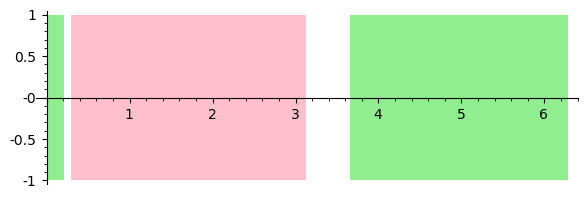

In [20]:
expected = Signal(
    RIF(0.0000000000000000, 6.2831853071795872),
    [(RIF(0.0000000000000000 , 0.19638079084936209), True),
     (RIF(0.29457118627404310, 3.1420926535897933 ), False),
     (RIF(3.6330446307131989 , 6.2831853071795872 ), True)],
)
expected.plot()

In [21]:
prop

C({y: [1 .. 5]}, G([0.39269908169872413 .. 0.39269908169872420], Atomic(x + 0.50000000000000000?)))

calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[4.0000000000000000 .. 9.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..2.0]
C = [4.0..9.0]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
computing sig
PolyObserver(x + 5, <flowstar.reachability.Reach object at 0x7fbd06fd7c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.48 seconds
roots = [[0.69516465888642742 .. 2.7900000000000201], [6.9780930661342148 .. 9.0706174267373872], [13.259999999998322 .. 15.358751205014289]]
domain = [0.0000000000000000 .. 18.848555921538762]
roots = [[0.69516465888642742 .. 2.7900000000000201], 
 [6.9780930661342148 .. 9.0706174267373872], 
 [13

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


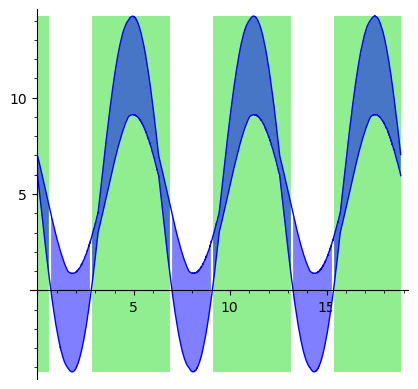

In [22]:
Atomic(x + 5).visualize(system.with_y0([RIF(1, 2), RIF(4, 9)]), 6*pi, order=10, step=0.01)

In [23]:
csig = G(RIF(pi/8), Atomic(x + 0.5)).context_signal_for_system(
    system.with_y0([RIF(1, 2), RIF(3, 4)]),
    2*sage.pi,
)

calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[3.0000000000000000 .. 4.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..2.0]
C = [3.0..4.0]
contexts = ['[1.0..2.0]', '[3.0..4.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 67 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.00000

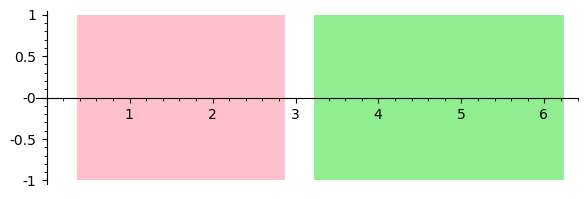

In [24]:
csig.signal.plot()

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.40711170307470173 .. 0.61454667659701901], [3.2805120832265517 .. 3.4581831943385093]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.40711170

top-level root detection: 1 items in 0.05 seconds
roots = [[0.44703668751374747 .. 0.53788587863095139], [3.3348727957041495 .. 3.4150662564681125]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.44703668751374747 .. 0.53788587863095139], 
 [3.3348727957041495 .. 3.4150662564681125]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.44703668751374747 .. 0.53788587863095139], 
 [3.3348727957041495 .. 3.4150662564681125]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.55597048275638139 .. 0.64524080704759091], [3.4560299371598732 .. 3.5372911894611843]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.55597048275638139 .. 0.64524080704759091], 
 [3.4560299371598732 .. 3.5372911894611843]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.55597048275638139 .. 0.64524080704759091], 
 [3.4560299371598732 .. 3.5372911894611843]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

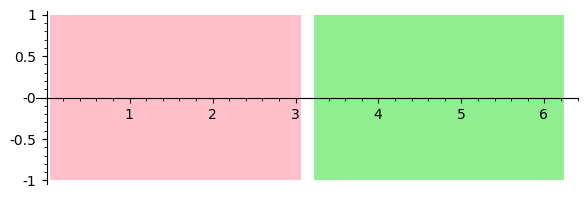

In [25]:
csig.refined_signal(2).plot()

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.46162062835032297 .. 0.51577798555648081], [3.2978520946802043 .. 3.3440878141858148]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.46162062

top-level root detection: 1 items in 0.03 seconds
roots = [[0.50959935656471144 .. 0.56276818924103167], [3.3640499819703233 .. 3.4092123613016874]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.50959935656471144 .. 0.56276818924103167], 
 [3.3640499819703233 .. 3.4092123613016874]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.50959935656471144 .. 0.56276818924103167], 
 [3.3640499819703233 .. 3.4092123613016874]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.41818416972290833 .. 0.46377788729634090], [3.3042300072659833 .. 3.3432113103021784]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.41818416972290833 .. 0.4637778872

top-level root detection: 1 items in 0.03 seconds
roots = [[0.47584206081467639 .. 0.52047168860627647], [3.3669199064678139 .. 3.4061871274550360]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.47584206081467639 .. 0.52047168860627647], 
 [3.3669199064678139 .. 3.4061871274550360]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.47584206081467639 .. 0.52047168860627647], 
 [3.3669199064678139 .. 3.4061871274550360]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.57116169681063355 .. 0.62243385461438572], [3.4326487698993424 .. 3.4796703208231073]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.57116169681063355 .. 0.62243385461438572], 
 [3.4326487698993424 .. 3.4796703208231073]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.57116169681063355 .. 0.62243385461438572], 
 [3.4326487698993424 .. 3.4796703208231073]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.62792929854275703 .. 0.67983068211390452], [3.4985672138826968 .. 3.5450635004068532]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.62792929854275703 .. 0.67983068211390452], 
 [3.4985672138826968 .. 3.5450635004068532]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.62792929854275703 .. 0.67983068211390452], 
 [3.4985672138826968 .. 3.5450635004068532]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.53002922164935240 .. 0.57559539523119053], [3.4267990520207116 .. 3.4675250185782960]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.53002922164935240 .. 0.5755953952

top-level root detection: 1 items in 0.03 seconds
roots = [[0.54099515569946676 .. 0.58459287796872650], [3.4474016863466228 .. 3.4865824266822152]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.54099515569946676 .. 0.58459287796872650], 
 [3.4474016863466228 .. 3.4865824266822152]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.54099515569946676 .. 0.58459287796872650], 
 [3.4474016863466228 .. 3.4865824266822152]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

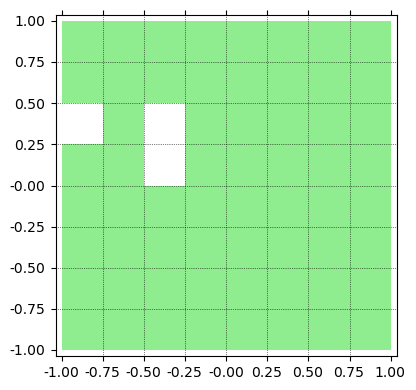

In [26]:
csig.plot_histogram2d(3)

In [27]:
csig = Atomic(x + 0.5).context_signal_for_system(
    system.with_y0([RIF(1, 2), RIF(3, 4)]),
    2*sage.pi,
)

calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[3.0000000000000000 .. 4.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..2.0]
C = [3.0..4.0]
contexts = ['[1.0..2.0]', '[3.0..4.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 3.5762786865234375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbe9a0538c0>, -y, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbe9a0538c0>, (([-1.0000000000 , -1.0000

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.40711170307470173 .. 0.61454667659701901], [3.2805120832265517 .. 3.4581831943385093]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.40711170

top-level root detection: 1 items in 0.02 seconds
roots = [[0.47563136952959811 .. 0.57555031010629332], [3.3489609103222104 .. 3.4345632934160979]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47563136952959811 .. 0.57555031010629332], 
 [3.3489609103222104 .. 3.4345632934160979]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47563136952959811 .. 0.57555031010629332], 
 [3.3489609103222104 .. 3.4345632934160979]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.05 seconds
roots = [[0.44656198334417823 .. 0.49565897052359559], [3.3152050935321191 .. 3.3573572183144287]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.44656198334417823 .. 0.49565897052359559], 
 [3.3152050935321191 .. 3.3573572183144287]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.44656198334417823 .. 0.49565897052359559], 
 [3.3152050935321191 .. 3.3573572183144287]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.50635392121338251 .. 0.55504311725946432], [3.3816613247997509 .. 3.4242679078130869]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.50635392121338251 .. 0.55504311725946432], 
 [3.3816613247997509 .. 3.4242679078130869]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.50635392121338251 .. 0.55504311725946432], 
 [3.3816613247997509 .. 3.4242679078130869]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.41818416972290833 .. 0.46377788729634090], [3.3042300072659833 .. 3.3432113103021784]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.41818416972290833 .. 0.46377788729634090], 
 [3.3042300072659833 .. 3.3432113103021784]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.41818416972290833 .. 0.46377788729634090], 
 [3.3042300072659833 .. 3.3432113103021784]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.47584206081467639 .. 0.52047168860627647], [3.3669199064678139 .. 3.4061871274550360]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47584206081467639 .. 0.52047168860627647], 
 [3.3669199064678139 .. 3.4061871274550360]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47584206081467639 .. 0.52047168860627647], 
 [3.3669199064678139 .. 3.4061871274550360]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.58854013899149060 .. 0.68685662188439145], [3.4753309920265813 .. 3.5635533466982823]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.58854013899149060 .. 0.68685662188439145], 
 [3.4753309920265813 .. 3.5635533466982823]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.58854013899149060 .. 0.68685662188439145], 
 [3.4753309920265813 .. 3.5635533466982823]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.56348570911865525 .. 0.61045450205115893], [3.4456891023373645 .. 3.4890663748791289]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.56348570911865525 .. 0.61045450205115893], 
 [3.4456891023373645 .. 3.4890663748791289]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.56348570911865525 .. 0.61045450205115893], 
 [3.4456891023373645 .. 3.4890663748791289]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.61657519738301636 .. 0.66405545561924651], [3.5061646712543024 .. 3.5493898106188784]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.61657519738301636 .. 0.6640554556

top-level root detection: 1 items in 0.04 seconds
roots = [[0.53002922164935240 .. 0.57559539523119053], [3.4267990520207116 .. 3.4675250185782960]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.53002922164935240 .. 0.57559539523119053], 
 [3.4267990520207116 .. 3.4675250185782960]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.53002922164935240 .. 0.57559539523119053], 
 [3.4267990520207116 .. 3.4675250185782960]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.56602477426960184 .. 0.60801409886506197], [3.4749187655019704 .. 3.5137823896301863]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.56602477426960184 .. 0.60801409886506197], 
 [3.4749187655019704 .. 3.5137823896301863]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.56602477426960184 .. 0.60801409886506197], 
 [3.4749187655019704 .. 3.5137823896301863]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

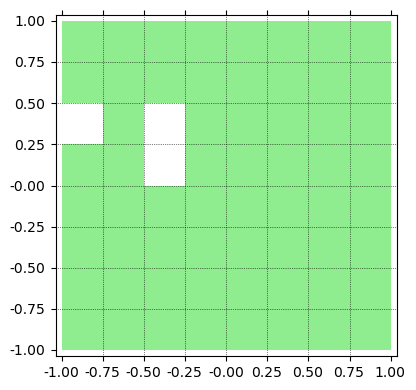

In [60]:
csig.G(pi/8).plot_histogram2d(3)

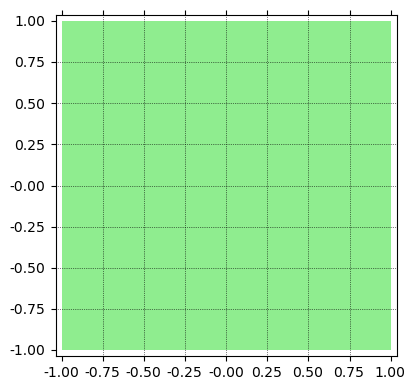

In [61]:
csig.G(pi/16).plot_histogram2d(3)

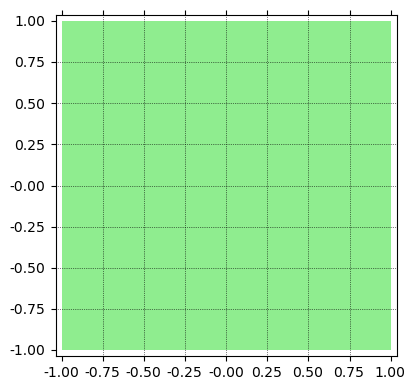

In [62]:
csig.G(pi/32).plot_histogram2d(3)

In [64]:
@interact
def _(t0=slider(0,0.30, step_size=0.001), auto_update=False):
    return csig.G(t0*pi).plot_histogram2d(3)

Manual interactive function <function _ at 0x7fbd1f3a2dd0> with 1 widget
  t0: TransformFloatSlider(value=0.0,…

In [31]:
Text?

In [69]:
a = animate(
    [csig.G(t0*pi).plot_histogram2d(4)
         + text(f"t = {t0}$\\pi$", (5, 0.4))
     for t0 in srange(0, 0.30, 0.005)])

In [33]:
#a.apng(savefile='images/animation3.apng', show_path=True)

Animation saved to file images/animation3.apng.


In [34]:
#from IPython.display import Image

In [66]:
#html(Image(url='images/animation3.apng', embed=False)._repr_html_())

In [70]:
a.ffmpeg(savefile='images/animation7.webm', ffmpeg_options="-threads 8 -lossless 1", delay=30)

In [71]:
html("<video src='images/animation7.webm' autoplay loop playsinline />")

<video src='images/animation7.webm' autoplay loop playsinline />

In [25]:
csig2 = Atomic(x + 0.5).context_signal_for_system(
    system.with_y0([RIF(1, 2), RIF(3, 4)]),
    2*sage.pi,
    restriction_method=RestrictionMethod.RECOMPUTE_FLOWPIPE,
)

calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[3.0000000000000000 .. 4.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..2.0]
C = [3.0..4.0]
contexts = ['[1.0..2.0]', '[3.0..4.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 2.86102294921875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbe62c16320>, -y, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbe62c16320>, (([-1.0000000000 , -1.000000

In [21]:
csig.G(0.19*pi).children[1].children[1].signal(0)

restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([4.0000000000 , 4.0000000000]) + ([-1.0000000000 , -1.0000000000] * y^2) + ([-1.0000000000 , -1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b''
PolyObserver((([4.0000000000 , 4.0000000000]) + ([-1.0000000000 , -1.0000000000] * y^2) + ([-1.0000000000 , -1.0000000000] * x^2)), <flowstar.reachability.Reach object at 0x7fbe62a5d230>, , symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b''
fprime = 
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.19 seconds
roots = [[0.0000000000000000 .. 6.2841853071785865]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.0000000000000000 .. 6.2841853

top-level root detection: 1 items in 0.05 seconds
roots = []
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = []
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = []
signal given bool roots: 1 items in 0.00 seconds


In [22]:
csig2.__class__.__name__

'ContextSignal'

In [23]:
csig2.G(0.19*pi).children[1].children[1].signal(0)

restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbe57f38410>, (([-1.0000000000 , -1.0000000000] * y)), symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.40711170307470173 .. 0.61454667659701901], [3.2805120832265517 .. 3.

False

In [28]:
@interact
def _(t0=slider(0,0.30, step_size=0.001), auto_update=False):
    p1 = csig2.G(t0*pi).plot_histogram2d(3)
    p2 = csig.G(t0*pi).plot_histogram2d(3)
    return graphics_array([
        p1,
        p2,
    ], nrows=1, ncols=2)

Manual interactive function <function _ at 0x7fbe57d88950> with 1 widget
  t0: TransformFloatSlider(value=0.0,…

In [86]:
a = animate(
    [csig2.G(t0*pi).plot_histogram2d(4)
         + text(f"t = {t0}$\\pi$", (5, 0.4))
     for t0 in srange(0, 0.30, 0.005)])

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.47072793662870432 .. 0.49905639711464412], [3.3011011382843999 .. 3.3243301381483735]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47072793

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.07 seconds
roots = [[0.47043638177668894 .. 0.49753256708445504], [3.3136769281903561 .. 3.3361838589149580]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47043638177668894 .. 0.49753256708445504], 
 [3.3136769281903561 .. 3.3361838589149580]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots 

top-level root detection: 1 items in 0.04 seconds
roots = [[0.49447078335979854 .. 0.52048130609477628], [3.3466384069061043 .. 3.3690446411052788]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.49447078335979854 .. 0.52048130609477628], 
 [3.3466384069061043 .. 3.3690446411052788]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.49447078335979854 .. 0.52048130609477628], 
 [3.3466384069061043 .. 3.3690446411052788]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.43858209041973933 .. 0.46325984752845884], [3.3017282136817884 .. 3.3224202694500274]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.43858209041973933 .. 0.46325984752845884], 
 [3.3017282136817884 .. 3.3224202694500274]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.43858209041973933 .. 0.46325984752845884], 
 [3.3017282136817884 .. 3.3224202694500274]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.46228438721363857 .. 0.48657731799057219], [3.3326743912159293 .. 3.3534357021814212]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46228438721363857 .. 0.48657731799057219], 
 [3.3326743912159293 .. 3.3534357021814212]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46228438721363857 .. 0.48657731799057219], 
 [3.3326743912159293 .. 3.3534357021814212]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.51081682386103666 .. 0.53651951565479140], [3.3642853576576636 .. 3.3870063198773784]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.51081682386103666 .. 0.53651951565479140], 
 [3.3642853576576636 .. 3.3870063198773784]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.51081682386103666 .. 0.53651951565479140], 
 [3.3642853576576636 .. 3.3870063198773784]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.57614440414804068 .. 0.60263182768116364], [3.4264398376710247 .. 3.4501582734534262]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.57614440414804068 .. 0.60263182768116364], 
 [3.4264398376710247 .. 3.4501582734534262]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.57614440414804068 .. 0.60263182768116364], 
 [3.4264398376710247 .. 3.4501582734534262]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.50901141399713834 .. 0.53362580473135113], [3.3734566074539316 .. 3.3955704342670346]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.50901141399713834 .. 0.53362580473135113], 
 [3.3734566074539316 .. 3.3955704342670346]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.50901141399713834 .. 0.53362580473135113], 
 [3.3734566074539316 .. 3.3955704342670346]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.01 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.54785052415656276 .. 0.5732497

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.40885713988087707 .. 0.43209462253178177], [3.2793608415589932 .. 3.2994167555793897]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.40885713

top-level root detection: 1 items in 0.03 seconds
roots = [[0.41086498868406723 .. 0.43327414665157327], [3.2912199028391508 .. 3.3104287696820216]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.41086498868406723 .. 0.43327414665157327], 
 [3.2912199028391508 .. 3.3104287696820216]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.41086498868406723 .. 0.43327414665157327], 
 [3.2912199028391508 .. 3.3104287696820216]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.37729667555976920 .. 0.39903863187498407], [3.2686031779135764 .. 3.2868796722299770]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.37729667555976920 .. 0.39903863187498407], 
 [3.2686031779135764 .. 3.2868796722299770]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.37729667555976920 .. 0.39903863187498407], 
 [3.2686031779135764 .. 3.2868796722299770]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.42706802934065957 .. 0.44891906469090365], [3.3177730376132363 .. 3.3366344750266950]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.42706802934065957 .. 0.4489190646

top-level root detection: 1 items in 0.04 seconds
roots = [[0.46969038598424367 .. 0.49365978944980277], [3.3459708645092134 .. 3.3664449534851278]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46969038598424367 .. 0.49365978944980277], 
 [3.3459708645092134 .. 3.3664449534851278]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46969038598424367 .. 0.49365978944980277], 
 [3.3459708645092134 .. 3.3664449534851278]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.05 seconds
roots = [[0.46238161067187294 .. 0.48492041260064656], [3.3519095645860019 .. 3.3713619630155485]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46238161067187294 .. 0.48492041260064656], 
 [3.3519095645860019 .. 3.3713619630155485]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46238161067187294 .. 0.48492041260064656], 
 [3.3519095645860019 .. 3.3713619630155485]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.45548807417082914 .. 0.47750564022523412], [3.3486451014573850 .. 3.3677561664450498]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.45548807417082914 .. 0.47750564022523412], 
 [3.3486451014573850 .. 3.3677561664450498]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.45548807417082914 .. 0.47750564022523412], 
 [3.3486451014573850 .. 3.3677561664450498]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.46242529619357247 .. 0.48417877957887723], [3.3603791786275296 .. 3.3794059896195799]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46242529619357247 .. 0.48417877957887723], 
 [3.3603791786275296 .. 3.3794059896195799]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46242529619357247 .. 0.48417877957887723], 
 [3.3603791786275296 .. 3.3794059896195799]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObse

top-level root detection: 1 items in 0.03 seconds
roots = [[0.59124434190104357 .. 0.61792249368839381], [3.4439490334760480 .. 3.4678288185164302]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.59124434190104357 .. 0.61792249368839381], 
 [3.4439490334760480 .. 3.4678288185164302]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.59124434190104357 .. 0.61792249368839381], 
 [3.4439490334760480 .. 3.4678288185164302]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.58627736048325607 .. 0.61179087869804139], [3.4503779862664956 .. 3.4732654403842372]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.58627736048325607 .. 0.61179087869804139], 
 [3.4503779862664956 .. 3.4732654403842372]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.58627736048325607 .. 0.61179087869804139], 
 [3.4503779862664956 .. 3.4732654403842372]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.62536819658858056 .. 0.65109791949699525], [3.4887937569742231 .. 3.5121054423875058]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62536819658858056 .. 0.65109791949699525], 
 [3.4887937569742231 .. 3.5121054423875058]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62536819658858056 .. 0.65109791949699525], 
 [3.4887937569742231 .. 3.5121054423875058]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObse

self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.53596642780496706 .. 0.55996695638768379], [3.4145095794000992 .. 3.4356006912262025]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.53596642780496706 .. 0.55996695638768379], 
 [3.4145095794000992 .. 3.4356006912262025]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.53596642780496706 .. 0.55996695638768379], 
 [3.4145095794000992 .. 3.4356006912262025]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.00

top-level root detection: 1 items in 0.02 seconds
roots = [[0.57274333203084193 .. 0.59744874179507768], [3.4510466742405037 .. 3.4727353426055250]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.57274333203084193 .. 0.59744874179507768], 
 [3.4510466742405037 .. 3.4727353426055250]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.57274333203084193 .. 0.59744874179507768], 
 [3.4510466742405037 .. 3.4727353426055250]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.62918295313710559 .. 0.65439418139447337], [3.4991160045598492 .. 3.5220000716019016]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62918295313710559 .. 0.6543941813

top-level root detection: 1 items in 0.03 seconds
roots = [[0.69029752699460478 .. 0.71583481707959185], [3.5596722565947702 .. 3.5836113878466512]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.69029752699460478 .. 0.71583481707959185], 
 [3.5596722565947702 .. 3.5836113878466512]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.69029752699460478 .. 0.71583481707959185], 
 [3.5596722565947702 .. 3.5836113878466512]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.62319748437758593 .. 0.64729246870587110], [3.5032783829450528 .. 3.5251003640399521]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62319748437758593 .. 0.64729246870587110], 
 [3.5032783829450528 .. 3.5251003640399521]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62319748437758593 .. 0.64729246870587110], 
 [3.5032783829450528 .. 3.5251003640399521]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.62684140275399569 .. 0.65047088910449758], [3.5125891730024538 .. 3.5341213515771619]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62684140275399569 .. 0.65047088910449758], 
 [3.5125891730024538 .. 3.5341213515771619]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62684140275399569 .. 0.65047088910449758], 
 [3.5125891730024538 .. 3.5341213515771619]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.00

top-level root detection: 1 items in 0.03 seconds
roots = [[0.51191405454122407 .. 0.53426148992228318], [3.4017907837313421 .. 3.4216678261082243]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.51191405454122407 .. 0.53426148992228318], 
 [3.4017907837313421 .. 3.4216678261082243]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.51191405454122407 .. 0.53426148992228318], 
 [3.4017907837313421 .. 3.4216678261082243]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.53888893309977203 .. 0.56157234451409821], [3.4319223416864215 .. 3.4521526259726603]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.53888893309977203 .. 0.56157234451409821], 
 [3.4319223416864215 .. 3.4521526259726603]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.53888893309977203 .. 0.56157234451409821], 
 [3.4319223416864215 .. 3.4521526259726603]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.05 seconds
roots = [[0.47550556658554538 .. 0.49673360793104405], [3.3826331393549646 .. 3.4010570268914800]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47550556658554538 .. 0.49673360793104405], 
 [3.3826331393549646 .. 3.4010570268914800]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47550556658554538 .. 0.49673360793104405], 
 [3.3826331393549646 .. 3.4010570268914800]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.57359672344598167 .. 0.59690540394165648], [3.4663372289645635 .. 3.4872659037570851]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.57359672344598167 .. 0.59690540394165648], 
 [3.4663372289645635 .. 3.4872659037570851]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.57359672344598167 .. 0.59690540394165648], 
 [3.4663372289645635 .. 3.4872659037570851]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.60865400958239967 .. 0.63119074592278202], [3.5013264910857881 .. 3.5220068194256995]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.60865400958239967 .. 0.63119074592278202], 
 [3.5013264910857881 .. 3.5220068194256995]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.60865400958239967 .. 0.63119074592278202], 
 [3.5013264910857881 .. 3.5220068194256995]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.54150362870532953 .. 0.56300422238121007], [3.4476562940446133 .. 3.4669696313174186]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.54150362870532953 .. 0.56300422238121007], 
 [3.4476562940446133 .. 3.4669696313174186]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.54150362870532953 .. 0.56300422238121007], 
 [3.4476562940446133 .. 3.4669696313174186]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.55884897168696512 .. 0.57994350529285477], [3.4706088670808150 .. 3.4900020061284809]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.55884897168696512 .. 0.57994350529285477], 
 [3.4706088670808150 .. 3.4900020061284809]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.55884897168696512 .. 0.57994350529285477], 
 [3.4706088670808150 .. 3.4900020061284809]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

In [88]:
a.ffmpeg(savefile='images/animation9.webm', ffmpeg_options="-threads 8 -lossless 1", delay=30)

In [89]:
html("<video src='images/animation9.webm' autoplay loop playsinline />")

<video src='images/animation9.webm' autoplay loop playsinline />

In [7]:
def mval(x, y):
    val = RIF((var("x")^2 + var("y")^2)({var("x"): x, var("y"): y}))
    if val.upper() < 4:
        return 1
    elif val.lower() > 4:
        return -1
    else:
        return 0

In [8]:
from matplotlib.colors import LinearSegmentedColormap

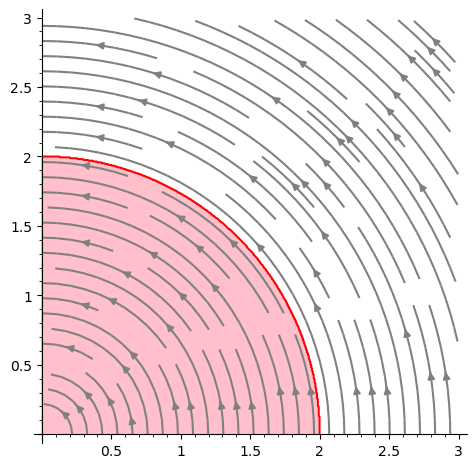

In [8]:
p = streamline_plot(tuple(sys.y),(x,0,3),(y,0,3), color='grey')\
    + region_plot((lambda x, y: x^2 + y^2 < 4),
                  (x, 0, 3),
                  (y, 0, 3),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1)
p.show()

In [8]:
csig = Atomic(var("x")^2 + var("y")^2 < 4).context_signal_for_system(
    system.with_y0([RIF(0, 3), RIF(0, 3)]),
    2*sage.pi,
    symbolic_composition=True,
    restriction_method=RestrictionMethod.SYMBOLIC,
)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
contexts = ['[0.0..3.0]', '[0.0..3.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7f125c4556e0>, 0, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 0
creating ContextSignal with coord=()
ContextSignal with coord=() and children=None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([4.0000000000 , 4.0000000000]) + ([-1.0000000000 , -1.0000000000] * y^2) + ([-1.0000000000 , -1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b''
PolyObserver((([4.000

In [ ]:
dir(csig)

In [9]:
csig2 = Atomic(var("x")^2 + var("y")^2 < 4).context_signal_for_system(
    system.with_y0([RIF(0, 3), RIF(0, 3)]),
    2*sage.pi,
    symbolic_composition=False,
    restriction_method=RestrictionMethod.SYMBOLIC,
)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
contexts = ['[0.0..3.0]', '[0.0..3.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 4.291534423828125e-06 sec
PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7f1270e46230>, 0, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 0
creating ContextSignal with coord=()
ContextSignal with coord=() and children=None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([4.0000000000 , 4.0000000000]) + ([-1.0000000000 , -1.0000000000] * y^2) + ([-1.0000000000 , -1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b''
PolyObserver((([4.000

In [10]:
csig3 = Atomic(var("x")^2 + var("y")^2 < 4).context_signal_for_system(
    system.with_y0([RIF(0, 3), RIF(0, 3)]),
    2*sage.pi,
    symbolic_composition=False,
    tentative_unpreconditioning=False,
    restriction_method=RestrictionMethod.SYMBOLIC,
)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
contexts = ['[0.0..3.0]', '[0.0..3.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 3.0994415283203125e-06 sec
PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7f1270e46140>, 0, symbolic_composition=False, tentative_unpreconditioning=False, mask=None)
fprime = 0
creating ContextSignal with coord=()
ContextSignal with coord=() and children=None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([4.0000000000 , 4.0000000000]) + ([-1.0000000000 , -1.0000000000] * y^2) + ([-1.0000000000 , -1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b''
PolyObserver((([4.0

In [12]:
@interact
def _(n=slider(0,10, step_size=1), auto_update=False):
    with suppress_stdout():
        return csig.plot_histogram2d(n)

Manual interactive function <function _ at 0x7f12544b8050> with 1 widget
  n: TransformIntSlider(value=0, desc…

In [13]:
@interact
def _(n=slider(0,10, step_size=1), auto_update=False):
    with suppress_stdout():
        return csig2.plot_histogram2d(n)

Manual interactive function <function _ at 0x7f1254408050> with 1 widget
  n: TransformIntSlider(value=0, desc…

In [14]:
@interact
def _(n=slider(0,10, step_size=1), auto_update=False):
    with suppress_stdout():
        return csig3.plot_histogram2d(n)

Manual interactive function <function _ at 0x7f12543db7a0> with 1 widget
  n: TransformIntSlider(value=0, desc…

In [18]:
@interact
def _(N=slider(1,10, step_size=1), auto_update=True):
    colors = ['pink', 'white', 'lightgreen']
    cm = LinearSegmentedColormap.from_list('ternary colors', colors, N=3)
    n = 2**N
    step = 3 / n
    step_lim = 3/max(n, 8)
    from matplotlib import ticker
    ticks = srange(-0.5, n, n/min(n, 8), include_endpoint=True)
    gridlines = srange(0.5, n-0.5, 1)
    tick_formatter = ticker.FuncFormatter(lambda k, _: '{0:.2f}'.format(
        -1 + 2 * (k + 0.5) / n))
    return matrix_plot(Matrix([[mval(RIF(x, x+step),RIF(y, y+step)) for x in srange(0, 3, step)] for y in srange(0, 3, step)]), cmap=cm, tick_formatter=(tick_formatter, tick_formatter), ticks=(ticks, ticks), gridlines=(gridlines, gridlines), origin='lower')

Interactive function <function _ at 0x7f1270dbb5f0> with 1 widget
  N: TransformIntSlider(value=1, description…

In [18]:
reach = system.with_y0([RIF(0, 3), RIF(0, 3)]).reach(2*pi, step=0.8, order=15, estimation=1e-5, cutoff_threshold=1e-10, precompose_taylor_models=True)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2


In [20]:
reach.successful

True

In [21]:
reach2 = system.with_y0([RIF(0, 3), RIF(0, 3)]).reach(2*pi, step=0.8, order=15, estimation=1e-5, cutoff_threshold=1e-10, precompose_taylor_models=True, initial_form=InitialForm.SPLIT_VARS)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
contexts = ['[0.0..3.0]', '[0.0..3.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2


In [61]:
reach(0)

[0.?e1, 0.?e1]

In [75]:
reach.context_dim

2

In [76]:
reach.initial_form

<InitialForm.COMBINED: 1>

In [62]:
[m.str(style='brackets') for m in reach(0)]

['[-1.1990219737958796e-10 .. 3.0000000001198100]',
 '[-1.2027133177755047e-10 .. 3.0000000001194410]']

In [74]:
RIF((4 - var("x")^2 - var("y")^2)({x: RIF(0, 3), y: RIF(0, 3)})).str(style='brackets')

'[-14.000000000000000 .. 4.0000000000000000]'

In [63]:
obs = PolyObserver(R(4 - var("x")^2 - var("y")^2), reach)

PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7fbe56d9b500>, None, symbolic_composition=False, tentative_unpreconditioning=False, mask=None)


In [64]:
obs(0).str(style='brackets')

'[-14.000000001435508 .. 4.0000000007205215]'

In [65]:
robs = RestrictedObserver(obs, [RIF(0.5, 0.625), RIF(-1.0, -0.825)])

restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]


In [66]:
robs(0).str(style='brackets')

'[-2.0103125006467808 .. -1.0624999994288681]'

In [93]:
obs = PolyObserver(R(4 - var("x")^2 - var("y")^2), reach2)

PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7fbe57f38aa0>, None, symbolic_composition=False, tentative_unpreconditioning=False, mask=None)


In [94]:
obs(0).str(style='brackets')

'[-14.000000001435514 .. 4.0000000007205241]'

In [96]:
robs = RestrictedObserver(obs, [RIF(0.5, 0.625), RIF(-1.0, -0.825)])

restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]


In [97]:
robs(0).str(style='brackets')

'[-2.0103125006467826 .. -1.0624999994288681]'

In [13]:
def f(m):
    return 3*((m + 1)/2)


def finv(m):
    return 2*m/3 - 1


In [14]:
f(finv(var("s")))

s

In [15]:
finv(f(var("s")))

s

In [92]:
RIF((4 - var("x")^2 - var("y")^2)({x: f(RIF(0.5, 0.625)), y: f(RIF(-1.0, -0.825))})).str(style='brackets')

'[-2.0103125000000004 .. -1.0625000000000000]'

In [91]:
f(0)

3/2

In [99]:
[m.str(style='brackets') for m in robs.roots()]

roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.80000000000000004 .. 0.80000000000000005], [1.5999999999999998 .. 1.6000000000000001], [2.3999999999999994 .. 2.4000000000000004], [3.1999999999999988 .. 3.2000000000000007], [3.9999999999999982 .. 4.0000000000000009], [4.7999999999999971 .. 4.8000000000000016], [5.5999999999999960 .. 5.6000000000000024], [6.3999999999999950 .. 6.4000000000000031]]


['[0.80000000000000004 .. 0.80000000000000005]',
 '[1.5999999999999998 .. 1.6000000000000001]',
 '[2.3999999999999994 .. 2.4000000000000004]',
 '[3.1999999999999988 .. 3.2000000000000007]',
 '[3.9999999999999982 .. 4.0000000000000009]',
 '[4.7999999999999971 .. 4.8000000000000016]',
 '[5.5999999999999960 .. 5.6000000000000024]',
 '[6.3999999999999950 .. 6.4000000000000031]']

In [10]:
def rval(t0, x, y, symbolic_composition=False):
    #print(f"x = {x.str(style='brackets')}; y = {y.str(style='brackets')}")
    x = finv(x)
    y = finv(y)
    #print(f"x' = {x.str(style='brackets')}; y' = {y.str(style='brackets')}")
    with suppress_stdout():
        obs = PolyObserver(R(4 - var("x")^2 - var("y")^2), reach, symbolic_composition=symbolic_composition)
        robs = RestrictedObserver(obs, [x, y])
        res = robs(t0)
    if res.lower() > 0:
        return 1
    elif res.upper() < 0:
        return -1
    else:
        return 0

In [11]:
@interact
def _(N=slider(1,10, step_size=1), auto_update=False):
    colors = ['pink', 'white', 'lightgreen']
    cm = LinearSegmentedColormap.from_list('ternary colors', colors, N=3)
    n = 2**N
    step = 3 / n
    step_lim = 3/max(n, 8)
    from matplotlib import ticker
    ticks = srange(-0.5, n, n/min(n, 8), include_endpoint=True)
    gridlines = srange(0.5, n-0.5, 1)
    tick_formatter = ticker.FuncFormatter(lambda k, _: '{0:.2f}'.format(
        -1 + 2 * (k + 0.5) / n))
    return matrix_plot(Matrix([[rval(0, RIF(x, x+step),RIF(y, y+step)) for x in srange(0, 3, step)] for y in srange(0, 3, step)]), cmap=cm, tick_formatter=(tick_formatter, tick_formatter), ticks=(ticks, ticks), gridlines=(gridlines, gridlines), origin='lower')

Manual interactive function <function _ at 0x7fe5b3af07a0> with 1 widget
  N: TransformIntSlider(value=1, desc…

In [21]:
csig1 = Atomic(var("x")^2 + var("y")^2 < 4).context_signal_for_system(
    system.with_y0([RIF(0, 3), RIF(0, 3)]),
    2*sage.pi,
    symbolic_composition=True,
    restriction_method=RestrictionMethod.SYMBOLIC,
)
csig2 = Atomic(var("x")^2 + var("y")^2 < 4).context_signal_for_system(
    system.with_y0([RIF(0, 3), RIF(0, 3)]),
    2*sage.pi,
    symbolic_composition=False,
    restriction_method=RestrictionMethod.SYMBOLIC,
)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
contexts = ['[0.0..3.0]', '[0.0..3.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 1.9073486328125e-06 sec
PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7fe5b1406e60>, 0, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 0
creating ContextSignal with coord=()
ContextSignal with coord=() and children=None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([4.0000000000 , 4.0000000000]) + ([-1.0000000000 , -1.0000000000] * y^2) + ([-1.0000000000 , -1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b''
PolyObserver((([4.000000

In [19]:
@interact
def _(N=slider(1,10, step_size=1), t0=slider(0, 2, step_size=1/32),
      symbolic_composition=checkbox(label='Symbolic composition', default=False), auto_update=False):
    colors = ['pink', 'white', 'lightgreen']
    cm = LinearSegmentedColormap.from_list('ternary colors', colors, N=3)
    n = 2**N
    step = 3 / n
    step_lim = 3/max(n, 8)
    from matplotlib import ticker
    ticks = srange(-0.5, n, n/min(n, 8), include_endpoint=True)
    gridlines = srange(0.5, n-0.5, 1)
    tick_formatter = ticker.FuncFormatter(lambda k, _: '{0:.2f}'.format(
        -1 + 2 * (k + 0.5) / n))
    return matrix_plot(Matrix([[rval(t0*pi, RIF(x, x+step),RIF(y, y+step), symbolic_composition=symbolic_composition) for x in srange(0, 3, step)] for y in srange(0, 3, step)]), cmap=cm, tick_formatter=(tick_formatter, tick_formatter), ticks=(ticks, ticks), gridlines=(gridlines, gridlines), origin='lower')

Manual interactive function <function _ at 0x7fe5b3aa8680> with 3 widgets
  N: TransformIntSlider(value=1, des…

In [24]:
@interact
def _(N=slider(1,10, step_size=1), t0=slider(0, 2, step_size=1/32),
      symbolic_composition=checkbox(label='Symbolic composition', default=False), auto_update=False):
    csig = csig1 if symbolic_composition else csig2
    with suppress_stdout():
        return csig.G(t0*pi).plot_histogram2d(N)

Manual interactive function <function _ at 0x7fe5b1087200> with 3 widgets
  N: TransformIntSlider(value=1, des…